# Text Analytics  

Natural Language Processing is a vast subject requiring extensive study.  The field is changing quickly, and advancements are being made at an extraordinary speed.

We will cover key concepts at a high level to get you started on a journey of exploration!

## Some basic ideas
### Text as data
Data often comes to us as text.  It contains extremely useful information,  and often what text can tell us,  numerical quantities cannot.  Yet we are challenged to effectively use text data in models,  because models can only accept numbers as inputs.  

Vectorizing text is the process of transforming text into numeric tensors.  

In this discussion on text analytics, we will focus on transforming text into numbers, and using it for modeling.

The first challenge text poses is that it needs to be converted to numbers, ie vectorized, before any ML/AI can consume them.

One way to vectorize text is to use one-hot encoding.

Consider the word list below.

| index | word | 
|--|--|
| 1 | [UNK] | 
| 2 | i | 
| 3 | love | 
| 4 | this | 
| 5 | and | 
| 6 | company | 
| 7 | living | 
| 8 | brooklyn | 
| 9 | new york | 
| 10 | sports | 
| 11 | politics | 
| 12 | entertainment | 
| 13 | in | 
| 14 | theater | 
| 15 | cinema | 
| 16 | travel | 
| 17 | we | 
| 18 | tomorrow | 
| 19 | believe | 
| 20 | the | 

Using the above, the word ‘company’ would be expressed as:  
 >   [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

But how did we come up with this dictionary, and how would we encode an entire sentence?




### Vectorizing Sentences as Sequences:
We build a dictionary of words from our corpus (corpus means a collection of documents), and call it the word index.  We then use the word indexes to create a sequence vector by replacing each word in our given sentence by its corresponding word index number.  

So "I love sports!" =  [2, 3, 10]  (Sentence 1)    

And "I love living in Brooklyn and in New York and some sports" = [2, 3, 7, 13, 8, 5, 13, 9, 5, 1, 10] (Sentence 2)  

### Vectorizing with Document Term Matrices:**  
This can be expressed as a matrix, with the word index numbers along one axis, and the 'documents' along the other.  This is called a ‘Document Term Matrix’, for example, a document term matrix for our hypothetical sentences would look as below:  


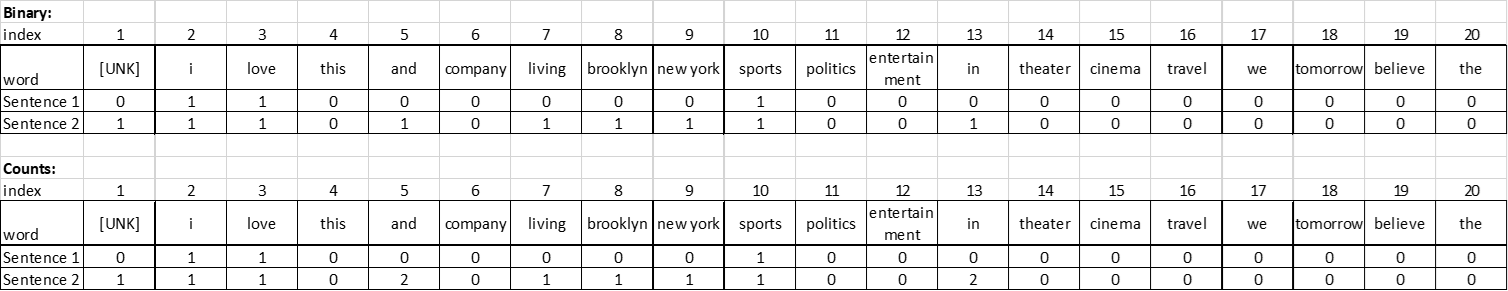

Now this matrix can be used as a numeric input into our modeling exercises.  

### Tokenization  

Think about what we did:  
  - We ignored case  
  - We ignored punctuation  
  - We broke up our sentences into words. This is called tokenization.  The words are our ‘tokens’  

There are other ways to tokenize.  
  - We could have broken the sentence into characters.
  - We could have used groups of 2 words as one token. So ‘I love sports’ would have the tokens ‘I love’ and ‘love sports’.  
  - We could have used 3 words as a token, so ‘I love living in Brooklyn’ would have the tokens ‘I love living’, ‘love living in’, and ‘living in Brooklyn’.  

### N-grams  
Using multiple words as a token is called the n-gram approach, where n is the number of words.  
  - Unigram: When each word is considered a token (most common approach)  
  - Bigram: Two consecutive words taken together  
  - Trigram: Three consecutive words taken together  
  
Bigrams, Trigrams etc help consider words together.
When building the document term matrices, we ignored the word order, and treated each sentence as a set of words.  This is called the ‘bag-of-words’ approach.


### TF-IDF  

**TF-IDF = Term Frequency - Inverse Document Frequency**  
Generally when creating a Document Term Matrix, we would consider the count of times a word appears in a document.  
However, not all words are equally important.  Words that appear in all documents are likely less important than words that are unique to a single or a few documents.  
Stopwords, such as of, and, the, is etc, would likely appear in all documents, and need to be weighted less.  

TF-IDF is the product of term frequency, and the inverse of the document frequency (ie, the count of documents in which the word appears).  

$TFIDF = TF × IDF$, where:   

$TF = Term Frequency$, the number of times a term appears in a document, and

$IDF = idf(t)=log((1+n)/(1+t)+1$
where $n$ is the total number of documents in the document set, and $t$ is the number of documents in the document set that contain term 
Intuitively, the above will have the effect of reducing the impact of common words on our document term matrix

Source: https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

### Summing it up   
Machine learning models, including deep learning, can only process numeric vectors (tensors).  Vectorizing text is the process of converting text into numeric tensors. Text vectorization processes come in many shapes and form, but they all follow the same template:  

1. First, you pre-process or standardize the text to make it easier to process, for instance by converting it to lowercase or removing punctuation.  
2. Then you split the text into units (called "tokens"), such as characters, words, or groups of words. This is called tokenization.  
3. Finally, you convert each such token into a numerical vector. This almost always involves first indexing all tokens present in the data (the vocabulary, or the dictionary).  You can do this:  

   - using the bag-of-words approach we saw earlier (using a document-term-matrix), or 
   - using word embeddings that attempt to capture the semantic meaning of the text.  


(Source: Adapted from Deep Learning with Python, François Chollet, Manning Publications)

**Next, some library imports**  

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

2023-11-18 11:20:42.084395: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 11:20:42.543619: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 11:20:42.546697: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-18 11:20:45.370920: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


***
## Text Pre-Processing  
**Common pre-processing tasks:**

Stemming and lemmatization are rarely used anymore as transformers create tokens of sub-words that take care of thia automatically.

  - Stop-word removal – Remove common words such as and, of, the, is etc.
  - Lowercasing all text
  - Removing punctuation
  - Stemming – removing the ends of words as to end up with a common root
  - Lemmatization – looking up words to their true root 

Let us look at some Text Pre-Processing:  

**More library imports** 

In [9]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [10]:
# Needed for NYU Jupyterhub

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/instructor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/instructor/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/instructor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
sentence = "I love living in Brooklyn!!"

**Remove punctuation**

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
for punctuation in string.punctuation:
    sentence = sentence.replace(punctuation,"")

print(sentence)

I love living in Brooklyn


**Convert to lowercase and remove stopwords**

In [14]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{"wasn't", 'needn', 'with', 'will', 'we', 'can', "doesn't", 'on', 'hers', 'been', 'down', 'isn', 'their', 'further', 'over', 'any', 'your', 'own', "shan't", 'which', 'am', 'she', 's', 'do', 'other', "you'll", 'now', 'll', 't', 'who', 'her', 'both', 'whom', 'these', 'his', 'he', 'just', 'him', 'were', "don't", "haven't", 'm', 'those', 'are', 'at', 'an', "hadn't", 'for', 'herself', 'but', 'should', 'off', "won't", 'not', 're', 'very', 'out', "that'll", 'itself', 'few', 'when', "mightn't", 'ain', 'from', "isn't", 'or', 'our', 'me', 'in', "you'd", 'than', 'again', 'them', 'aren', 'yourselves', "it's", 'himself', 'until', 'myself', 'be', "should've", 'too', 'here', 'wouldn', "couldn't", 'below', "hasn't", 'mustn', 'the', 'and', 'my', 'doesn', "needn't", 'having', 'while', 'is', 'was', 'about', 'such', 'themselves', 'as', 'each', 'why', 'between', 'y', 'they', 'yours', "you're", 'theirs', 'o', 'some', 'had', 'its', 've', 'mightn', 'weren', 'what', 'didn', 'ourselves', 'most', 'because', 'aga

In [15]:
print([i for i in sentence.lower().split() if i not in stopwords])


['love', 'living', 'brooklyn']


### Code for Tokenizing and Creating Sequences with Tensorflow

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = ["I love living in Brooklyn", "I am not sure if I enjoy politics"]

tokenizer = Tokenizer(oov_token='[UNK]', num_words=None)
tokenizer.fit_on_texts(text)   


In [17]:
# This step transforms each text in texts to a sequence of integers. 
# It takes each word in the text and replaces it with its corresponding integer value from the word_index dictionary.   

seq = tokenizer.texts_to_sequences(['love I living Brooklyn in state'])  # note 'state' is not in vocabulary
seq

[[3, 2, 4, 6, 5, 1]]

In [18]:
# The dictionary
tokenizer.word_index

{'[UNK]': 1,
 'i': 2,
 'love': 3,
 'living': 4,
 'in': 5,
 'brooklyn': 6,
 'am': 7,
 'not': 8,
 'sure': 9,
 'if': 10,
 'enjoy': 11,
 'politics': 12}

**Document Term Matrix - Counts**

In [19]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='count')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


**Document Term Matrix - Binary**

In [20]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='binary')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


**Document Term Matrix - TF-IDF**

In [21]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='tfidf')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,0.510826,0.693147,0.693147,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.864903,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147


**Document Term Matrix based - Frequency**

In [22]:
pd.DataFrame(tokenizer.texts_to_matrix(text, mode='freq')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,0.0,0.20,0.2,0.2,0.2,0.2,0.000,0.000,0.000,0.000,0.000,0.000
1,0.0,0.25,0.0,0.0,0.0,0.0,0.125,0.125,0.125,0.125,0.125,0.125


In [23]:
tokenizer.texts_to_matrix(text, mode='binary')

array([[0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.]])

In [24]:
new_text = ['There was a person living in Brooklyn', 'I love and enjoy dancing']
pd.DataFrame(tokenizer.texts_to_matrix(new_text, mode='count')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
pd.DataFrame(tokenizer.texts_to_matrix(new_text, mode='binary')[:,1:], columns = tokenizer.word_index.keys())

,[UNK],i,love,living,in,brooklyn,am,not,sure,if,enjoy,politics
0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Word frequency
pd.DataFrame(dict(tokenizer.word_counts).items()).sort_values(by=1, ascending=False)

,0,1
0,i,3
1,love,1
2,living,1
3,in,1
4,brooklyn,1
5,am,1
6,not,1
7,sure,1
8,if,1
9,enjoy,1


In [27]:
# How many docs does the word appear in?
tokenizer.word_docs

defaultdict(int,
            {'i': 2,
             'brooklyn': 1,
             'love': 1,
             'in': 1,
             'living': 1,
             'enjoy': 1,
             'not': 1,
             'if': 1,
             'sure': 1,
             'am': 1,
             'politics': 1})

In [28]:
# How many documents in the corpus
tokenizer.document_count

2

In [29]:
tokenizer.word_index.keys()

dict_keys(['[UNK]', 'i', 'love', 'living', 'in', 'brooklyn', 'am', 'not', 'sure', 'if', 'enjoy', 'politics'])

In [30]:
len(tokenizer.word_index)

12

**Convert text to sequences based on the word index**

In [31]:
seq = tokenizer.texts_to_sequences(new_text)
seq

[[1, 1, 1, 1, 4, 5, 6], [2, 3, 1, 11, 1]]

In [32]:
from tensorflow.keras.utils import pad_sequences

seq = pad_sequences(seq, maxlen = 8)
seq

array([[ 0,  1,  1,  1,  1,  4,  5,  6],
       [ 0,  0,  0,  2,  3,  1, 11,  1]], dtype=int32)

In [33]:
depth = len(tokenizer.word_index)

tf.one_hot(seq, depth=depth)

<tf.Tensor: shape=(2, 8, 12), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]], dtype=float32)>

In [34]:
text2 = ['manning pub adt ersa']
# tokenizer.fit_on_texts(text2)  

In [35]:
tokenizer.texts_to_matrix(text2, mode = 'binary')  

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [36]:
tokenizer.texts_to_sequences(text2)

[[1, 1, 1, 1]]

## Wordcloud  
Wordclouds are visual representations of text data.  They work by arranging words in a shape so that words with the highest frequency appear in a larger font.  They are not particularly useful as an analytical tool, except as a visual device to draw attention to key themes.  

Creating wordclouds using Python is relatively simple.  Example below.  


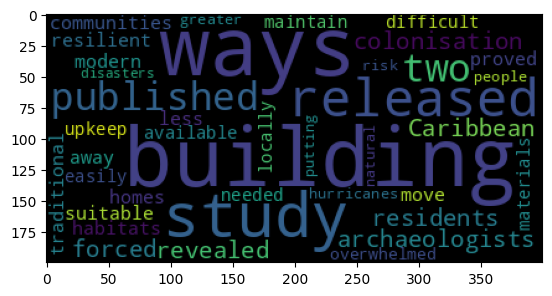

In [37]:
some_text = '''A study released in 2020, published by two 
archaeologists, revealed how colonisation forced 
residents in Caribbean communities to move away 
from traditional and resilient ways of building 
homes to more modern but less suitable ways. These 
habitats have proved to be more difficult to 
maintain, with the materials needed for upkeep not 
locally available, and the buildings easily 
overwhelmed by hurricanes, putting people at 
greater risk during natural disasters.'''

from wordcloud import WordCloud
plt.imshow(WordCloud().generate_from_text(some_text))

***
## Topic Modeling

  - Topic modeling, in essence, is a clustering technique to group similar documents together in a single cluster.
  - Topic modeling can be used to find themes across a large corpus of documents as each cluster can be expected to represent a certain theme.
  - The analyst has to specify the number of ‘topics’ (or clusters) to identify.
  - For each cluster that is identified by topic modeling, top words that relate to that cluster can also be reviewed.
  - In practice however, the themes are not always obvious, and trial and error is an extensive part of the topic modeling process.  
  - Topic modeling can be extremely helpful in starting to get to grips with a large data set.
  - Topic Modeling is not based on neural networks, but instead on linear algebra relating to matrix decomposition of the document term matrix for the corpus.
  - Creating the document term matrix is the first step for performing topic modeling.  There are several decisions for the analyst to consider when building the document term matrix.
    - Whether to use a count based or TF-IDF based vectorization for building the document term matrix,
    - Whether to use words, or n-grams, and if n-grams, then what should n be
  - When performing matrix decomposition, again there are decisions to be made around the mathematical technique to use.  The most common ones are:
    - NMF: Non-negative Matrix Factorization
    - LDA: LatentDirichletAllocation

**Matrix Factorization** 
Matrix factorization of the document term matrix gives us two matrices, one of which identifies each document in our list as belonging to a particular topic, and the other gives us the top terms in every topic.  

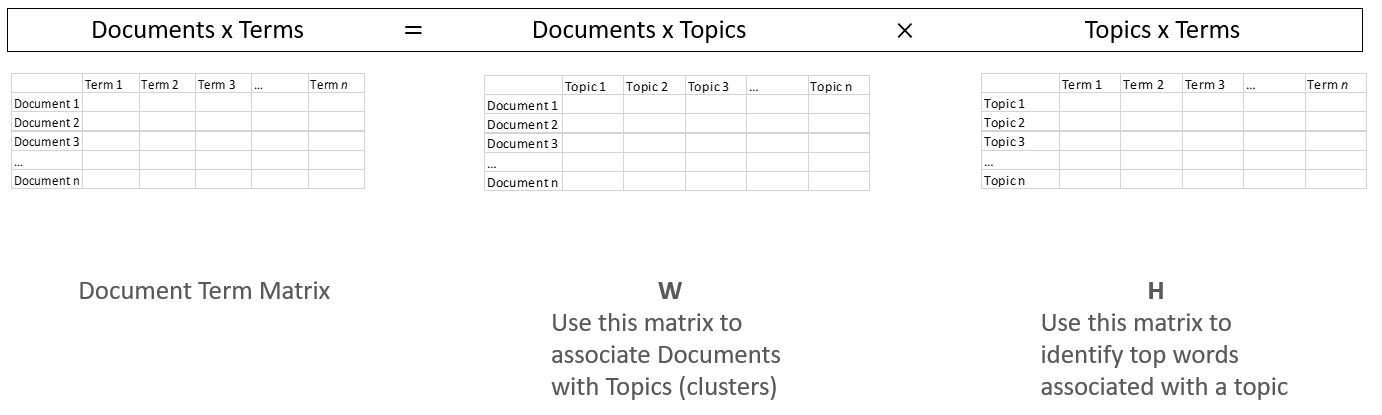


**Topic Modeling in Action**  
Steps:  
1. Load the text data.  Every tweet is a ‘document’, as an entry in a list.
2. Vectorize and create a document term matrix based on count (or TF-IDF).  If required, remove stopwords as part of pre-processing options.  Specify n for if n-grams are to be used instead of words.
3. Pick the model – NMF or LDA – and apply to the document term matrix from step 2.  
  - More information on NMF at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
  - More information on LDA at https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html 
4. Extract and use the W and H matrices to determine topics and terms.


Load the file 'Corona_NLP_train.csv’ for Corona related tweets, using the column ‘Original Tweet’ as the document corpus.
Cluster the tweets into 10 different topics using both NMF and LDA, and examine the results.

In [38]:
# Regular library imports

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [39]:
# Read the data
# Adapted from source: https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

text = pd.read_csv('Corona_NLP_train.csv', encoding='latin1')

text = text.sample(10000) # Let us limit to 10000 random articles for illustration purposes

print('text.shape', text.shape)


text.shape (10000, 6)


In [40]:
# Read stopwords from file

custom_stop_words = []
file = open(file = "stopwords.txt", mode = 'r')
custom_stop_words = file.read().split('\n')


**Next, we do topic modeling on the tweets.  The next few cells have the code to do this.**  

It is a lot of code, but let us just take a step back from the code to think about what it does.  

We need to provide it three inputs: 
 - the text,  
 - the number of topics we want identified, and  
 - the value of n for our ngrams.  

Once done, the code below will create two dataframes:  

   - words_in_topics_df - top_n_words per topic  
   - topic_for_doc_df - topic to which a document is identified  

Additional outputs of interest  
- vocab = This is the dict from which you can pull the words, eg vocab['ocean']  
- terms = Just the list equivalent of vocab, indexed in the same order  
- term_frequency_table = dataframe with the frequency of terms  
- doc_term_matrix = Document term matrix  (doc_term_matrix = W x H)  
- W = This matrix has docs as rows and num_topics as columns  
- H = This matrix has num_topics as rows and vocab as columns  

    

In [41]:
# Specify inputs
# Input incoming text as a list called raw_documents

raw_documents= list(text['OriginalTweet'].values.astype('U'))
max_features = 5000 # vocab size
num_topics = 10
ngram = 2 # 2 for bigrams, 3 for trigrams etc

In [42]:
# use count based vectorizer from sklearn

# vectorizer = CountVectorizer(stop_words = custom_stop_words, min_df = 2, analyzer='word', ngram_range=(ngram, ngram))

# or use TF-IDF based vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features= max_features, stop_words=custom_stop_words, analyzer='word', ngram_range=(ngram, ngram))

# Create document term matrix
doc_term_matrix = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix in variable doc_term_matrix\n" % (doc_term_matrix.shape[0], doc_term_matrix.shape[1]) )


vocab = vectorizer.vocabulary_ #This is the dict from which you can pull the words, eg vocab['ocean']
terms = vectorizer.get_feature_names_out() #Just the list equivalent of vocab, indexed in the same order
print("Vocabulary has %d distinct terms, examples below " % len(terms))
print(terms[500:550], '\n')

term_frequency_table = pd.DataFrame({'term': terms,'freq': list(np.array(doc_term_matrix.sum(axis=0)).reshape(-1))})
term_frequency_table = term_frequency_table.sort_values(by='freq', ascending=False).reset_index()

freq_df = pd.DataFrame(doc_term_matrix.todense(), columns = terms)
freq_df = freq_df.sum(axis=0)
freq_df = freq_df.sort_values(ascending=False)

Created 10000 X 5000 document-term matrix in variable doc_term_matrix

Vocabulary has 5000 distinct terms, examples below 
['click link' 'climate change' 'clorox wipes' 'close contact'
 'close coronavirus' 'close covid' 'close doors' 'close eye'
 'close people' 'close retail' 'close store' 'close stores' 'closed covid'
 'closed march' 'closed notice' 'closed online' 'closed retail'
 'closes harper' 'closing retail' 'closing stores' 'closures explode'
 'closures https' 'closures increasing' 'cloth face' 'clothing retail'
 'cnn coronavirus' 'cnn https' 'coles woolworths' 'collapse global'
 'collapse oil' 'collectors supermarket' 'college karachi'
 'combat coronavirus' 'combat covid' 'combat spread' 'combined 100'
 'comfort food' 'coming days' 'coming house' 'coming months'
 'coming weeks' 'coming work' 'committed helping' 'commodity prices'
 'common sense' 'communities food' 'community amp' 'community coronavirus'
 'community covid' 'community food'] 



In [43]:
# create the model
# Pick between NMF or LDA methods (don't know what they are, try whichever gives better results)

# Use NMF
# model = NMF( init="nndsvd", n_components=num_topics ) 

# Use LDA
model = LatentDirichletAllocation(n_components=num_topics, learning_method='online') 
    
# apply the model and extract the two factor matrices
W = model.fit_transform( doc_term_matrix ) #This matrix has docs as rows and k-topics as columns
H = model.components_ #This matrix has k-topics as rows and vocab as columns
print('Shape of W is', W.shape, 'docs as rows and', num_topics, 'topics as columns. First row below')
print(W[0].round(1))
print('\nShape of H is', H.shape, num_topics, 'topics as rows and vocab as columns. First row below')
print(H[0].round(1))

Shape of W is (10000, 10) docs as rows and 10 topics as columns. First row below
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Shape of H is (10, 5000) 10 topics as rows and vocab as columns. First row below
[0.1 0.1 0.1 ... 0.1 0.1 0.1]


In [44]:
# Check which document belongs to which topic, and print value_count
topic_for_doc_df = pd.DataFrame(columns = ['article', 'topic', 'value'])
for i in range(W.shape[0]):
    a = W[i] 
    b = np.argsort(a)[::-1]
    temp_df = pd.DataFrame({'article': [i], 'topic':['Topic_'+str(b[0])], 'value': [a[b[0]]]})
    topic_for_doc_df = pd.concat([topic_for_doc_df, temp_df])

top_docs_for_topic_df = pd.DataFrame(columns = ['topic', 'doc_number', 'weight'])    
for i in range(W.shape[1]):
    topic = i
    temp_df = pd.DataFrame({'topic': ['Topic_'+str(i) for x in range(W.shape[0])], 
                            'doc_number':  list(range(W.shape[0])), 
                            'weight': list(W[:,i])})
    temp_df = temp_df.sort_values(by=['topic', 'weight'], ascending=[True, False])
    top_docs_for_topic_df = pd.concat([top_docs_for_topic_df, temp_df])
# Add text to the top_docs dataframe as a new column
top_docs_for_topic_df['text']=[raw_documents[i] for i in list(top_docs_for_topic_df.doc_number)] 

In [45]:
# Print top two docs for each topic
print('\nTop documents for each topic')
(top_docs_for_topic_df.groupby('topic').head(2))


Top documents for each topic


,topic,doc_number,weight,text
6528,Topic_0,6528,0.789913,Panic buying is not limited to supermarkets ...
2271,Topic_0,2271,0.783772,is not limited to supermarkets and pharmacies ...
565,Topic_1,565,0.737612,Update The TDSB continues to do everything we ...
7,Topic_1,7,0.732868,? BREAKING: A New Jersey man is facing charges...
1470,Topic_2,1470,0.810068,@BreakfastNews \r\r\n\r\r\nSupermarket #purcha...
9212,Topic_2,9212,0.810068,Supermarket #purchaselimits mean people have t...
479,Topic_3,479,0.751776,As the demand for food delivery continues to s...
42,Topic_3,42,0.751084,Two U S Postal Service employees based at the ...
1016,Topic_4,1016,0.789756,WeÂre continuing operations at our plants to ...
282,Topic_4,282,0.763641,So far the only good thing to come from Covid-...


In [46]:
print('Topic number and counts of documents against each:')
(topic_for_doc_df.topic.value_counts())

Topic number and counts of documents against each:


topic
Topic_9    1682
Topic_8    1207
Topic_5     980
Topic_7     977
Topic_4     900
Topic_1     878
Topic_3     866
Topic_0     863
Topic_2     854
Topic_6     793
Name: count, dtype: int64

In [47]:
# Create dataframe with top-10 words for each topic
top_n_words = 10

words_in_topics_df = pd.DataFrame(columns = ['topic', 'words', 'freq'])
for i in range(H.shape[0]):
    a = H[i] 
    b = np.argsort(a)[::-1]
    np.array(b[:top_n_words])
    words = [terms[i] for i in b[:top_n_words]]
    freq = [a[i] for i in b[:top_n_words]]
    temp_df = pd.DataFrame({'topic':'Topic_'+str(i), 'words': words, 'freq': freq})
    words_in_topics_df = pd.concat([words_in_topics_df, temp_df])

print('\n')
print('Top', top_n_words, 'words dataframe with weights')
(words_in_topics_df.head(10))



Top 10 words dataframe with weights


,topic,words,freq
0,Topic_0,covid pandemic,62.386715
1,Topic_0,panic buying,50.365793
2,Topic_0,people panic,32.363762
3,Topic_0,food amp,20.536223
4,Topic_0,food banks,19.636655
5,Topic_0,impact covid,14.943531
6,Topic_0,food https,14.657873
7,Topic_0,prices low,13.915957
8,Topic_0,food bank,13.733423
9,Topic_0,demand covid,13.314673


In [48]:
# print as list
print('\nSame list as above as a list')
words_in_topics_list = words_in_topics_df.groupby('topic')['words'].apply(list)
lala =[]
for i in range(len(words_in_topics_list)):
    a = [list(words_in_topics_list.index)[i]]
    b = words_in_topics_list[i]
    lala = lala + [a+b]
    print(a + b) 
    
    


Same list as above as a list
['Topic_0', 'covid pandemic', 'panic buying', 'people panic', 'food amp', 'food banks', 'impact covid', 'food https', 'prices low', 'food bank', 'demand covid']
['Topic_1', 'coronavirus toiletpaper', 'shopping online', 'local supermarket', 'toilet paper', 'panic buying', 'buying food', 'prices coronavirus', 'covid19 covid_19', 'supply chains', 'food supplies']
['Topic_2', 'covid19 coronavirus', 'toilet paper', 'covid https', 'consumer protection', 'buy food', 'panic buying', 'amid coronavirus', 'food prices', 'panic buy', 'panic buyers']
['Topic_3', 'supermarket shelves', 'retail store', 'food supply', 'consumer spending', 'covid lockdown', 'increase prices', 'coronavirus covid2019', 'supermarket today', 'positive covid', 'stock market']
['Topic_4', 'coronavirus pandemic', 'gas prices', 'covid crisis', 'grocery store', 'supply chain', 'toiletpaper coronavirus', 'store workers', 'toiletpaper https', 'crisis https', 'price gouging']
['Topic_5', 'coronavirus 

In [49]:
# Top terms
print('\nTop 10 most numerous terms:')
term_frequency_table.head(10)


Top 10 most numerous terms:


,index,term,freq
0,1967,grocery store,339.755876
1,766,coronavirus https,183.351744
2,1989,hand sanitizer,133.757725
3,2714,online shopping,124.735159
4,737,coronavirus covid19,124.366836
5,4642,toilet paper,116.876422
6,1075,covid19 coronavirus,101.232361
7,2799,panic buying,95.178735
8,2683,oil prices,83.785991
9,999,covid pandemic,74.929433


***
## Applying ML and AI Algorithms to Text Data

We will use movie reviews as an example to build a model to predict whether the review is positive or negative.  The data already has human assigned labels, so we can try to see if our models can get close to human level performance.

### Movie Review Classification with XGBoost

Let us get some text data to play with.  We will use the IMDB movie review dataset which has 50,000 movie reviews, classified as positive or negative.  

We load the data, and look at some random entries.  

There are 25k positive, and 25k negative reviews.

In [50]:
# Library imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer


In [51]:
# Read the data, create the X and y variables, and look at the dataframe

df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [52]:
# let us look at two random reviews

x = np.random.randint(0, len(df))
print(df['sentiment'][x:x+2])
list(df['review'][x:x+2])

5255    positive
5256    positive
Name: sentiment, dtype: object


['This is another of Robert Altman\'s underrated films(let\'s be honest, the only movie he\'s made that really didn\'t work was Ready to Wear), and Sandy Dennis gives a spellbinding performance in it.She is far better here than she was in "The Out of Towners". The material, I will admit, is beneath the great director Altman and the extraordinary actress Dennis, but that hardly matters anyway.As long as there allowed to do their thing and do it well, just about any story will do.',
 "This is a well directed film from John Cromwell who was not a great director but who did make some fine films including the 1937 version of 'The Prsoner of Zenda'. Set in a London that only Hollywood could manage, atmospheric but nothing like the real thing, it is a story of obsession and thwarted love, from the novel by Somerset Maughan.<br /><br />I was looking forward to seeing it on DVD as I had never seen it before and being a great admirer of Bette Davis wanted to see her in a role considered one of h

In [53]:
# We do the train-test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(type(X_train))
print(type(y_train))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [54]:
X_train

29359    OK, the portrayal of the stereotyped 'indians'...
20410    It's actually a good thing Sean Connery retire...
10573    Well, it is standard Hollywood schmaltz that y...
28938    By no means my favourite Austen novel, and Pal...
3224     I found Tremors 4:The Legend Begins, to be dul...
                               ...                        
41434    What makes this documentary special from a fil...
41234    I consider this movie a masterpiece, but it to...
28884    For the life of me I can't understand the good...
6354     Bugsy Siegel was 31 when he went out to the We...
4804     "Escanaba in da Moonlight" is the first showca...
Name: review, Length: 40000, dtype: object

**Approach**  
Extract a vocabulary from the training text, and give each word a number index.  

Take the top 2000 words from this vocab, and convert all tweets into a numerical vector by putting a "1" in the position for a word if that word appears in the tweet.  Words not in the vocab get mapped to [UNK]=1. 

Construct a Document Term Matrix (which can be binary, or counts, or TFIDF).  This is the array we use for X.  


In [55]:
# We tokenize the text based on the training data

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='[UNK]', num_words=2000)

tokenizer.fit_on_texts(X_train)   

In [56]:
# let us look around the tokenized data


# Word frequency from the dictionary (tokenizer.word_counts())
print('Top words\n', pd.DataFrame(dict(tokenizer.word_counts).items()).sort_values(by=1, ascending=False).head(20).reset_index(drop=True))


# How many documents in the corpus
print('\nHow many documents in the corpus?', tokenizer.document_count)

      
print('Total unique words', len(tokenizer.word_index))

Top words
         0       1
0     the  532349
1     and  259438
2       a  258068
3      of  231761
4      to  214196
5      is  168261
6      br  161323
7      in  149173
8      it  125314
9       i  123791
10   this  120617
11   that  109509
12    was   76437
13     as   73354
14   with   69904
15    for   69883
16  movie   69377
17    but   66696
18   film   62190
19     on   54533

How many documents in the corpus? 40000
Total unique words 111822


In [57]:
# We can also look at the word_index
# But it is very long, and we will not 
# print(tokenizer.word_index)

# Let us print the first 20
list(tokenizer.word_index.items())[:20]

[('[UNK]', 1),
 ('the', 2),
 ('and', 3),
 ('a', 4),
 ('of', 5),
 ('to', 6),
 ('is', 7),
 ('br', 8),
 ('in', 9),
 ('it', 10),
 ('i', 11),
 ('this', 12),
 ('that', 13),
 ('was', 14),
 ('as', 15),
 ('with', 16),
 ('for', 17),
 ('movie', 18),
 ('but', 19),
 ('film', 20)]

In [58]:
# Next, we convert the tokens to a document term matrix
X_train = tokenizer.texts_to_matrix(X_train, mode='binary')
X_test = tokenizer.texts_to_matrix(X_test, mode='binary')

In [59]:
print('X_train.shape', X_train.shape)
X_train[198:202]

X_train.shape (40000, 2000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.]])

In [60]:
print('y_train.shape', y_train.shape)
y_train[198:202]

y_train.shape (40000,)


4138     positive
47705    negative
4524     positive
36673    positive
Name: sentiment, dtype: object

In [61]:
# let us encode the labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train.values.ravel()) # This needs a 1D array
y_test = le.fit_transform(y_test.values.ravel()) # This needs a 1D array


In [62]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [63]:
# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [64]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

/opt/conda/envs/mggy8413/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Checking accuracy on the training set

In [65]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_train)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     20011
           1       0.92      0.94      0.93     19989

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



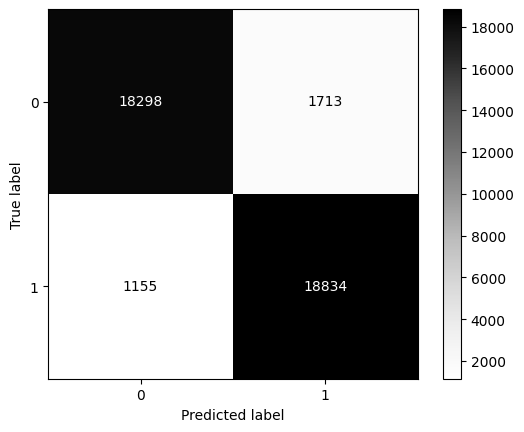

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_train, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_train, y = y_train, cmap='Greys');

In [67]:
# We can get probability estimates for class membership using XGBoost
model_xgb.predict_proba(X_test).round(3)

array([[0.555, 0.445],
       [0.175, 0.825],
       [0.171, 0.829],
       ...,
       [0.289, 0.711],
       [0.161, 0.839],
       [0.111, 0.889]], dtype=float32)

#### Checking accuracy on the test set

In [68]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4989
           1       0.86      0.89      0.87      5011

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



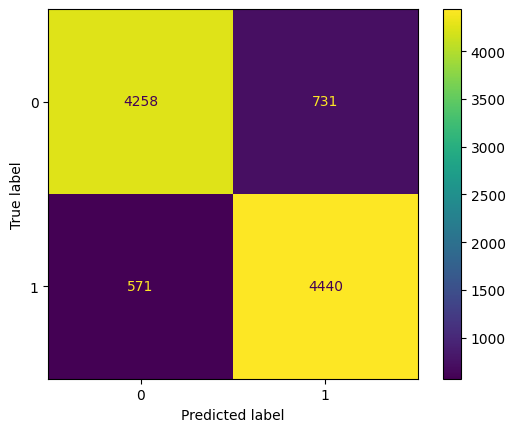

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_test, y = y_test);

#### Is our model doing any better than a naive classifier?

In [70]:
from sklearn.dummy import DummyClassifier
X = X_train
y = y_train
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.500275

In [71]:
dummy_clf.predict_proba(X_train)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])


**'prior'** and **'most_frequent'** are identical except how probabilities are returned.
`'most_frequent'` returns one-hot probabilities, while `'prior'` returns actual probability values.


In [72]:

from sklearn.dummy import DummyClassifier
X = X_train
y = y_train
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.500275

In [73]:
dummy_clf.predict_proba(X_train)

array([[0.500275, 0.499725],
       [0.500275, 0.499725],
       [0.500275, 0.499725],
       ...,
       [0.500275, 0.499725],
       [0.500275, 0.499725],
       [0.500275, 0.499725]])

In [74]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.502825

In [75]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

0.49935

***
### Movie Review Classification using a Fully Connected NN

In [76]:

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Input, LSTM
from tensorflow import keras

model = keras.Sequential()

model.add(Input(shape=(X_train.shape[1],))) # INPUT layer
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              2001000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 4004001 (15.27 MB)
Trainable params: 4004001 (15.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, batch_size=1000, validation_split=0.2, callbacks= [callback])

Epoch 1/15
32/32 [==============================] - 10s 294ms/step - loss: 0.6420 - acc: 0.6991 - val_loss: 0.8020 - val_acc: 0.5976
Epoch 2/15
32/32 [==============================] - 10s 304ms/step - loss: 0.4107 - acc: 0.8210 - val_loss: 0.5045 - val_acc: 0.7598
Epoch 3/15
32/32 [==============================] - 10s 305ms/step - loss: 0.3235 - acc: 0.8638 - val_loss: 0.4685 - val_acc: 0.7924
Epoch 4/15
32/32 [==============================] - 10s 307ms/step - loss: 0.2911 - acc: 0.8760 - val_loss: 0.3014 - val_acc: 0.8730
Epoch 5/15
32/32 [==============================] - 9s 292ms/step - loss: 0.2628 - acc: 0.8907 - val_loss: 0.2962 - val_acc: 0.8769
Epoch 6/15
32/32 [==============================] - 10s 305ms/step - loss: 0.2351 - acc: 0.9043 - val_loss: 0.3019 - val_acc: 0.8736
Epoch 7/15
32/32 [==============================] - 10s 308ms/step - loss: 0.1965 - acc: 0.9228 - val_loss: 0.4486 - val_acc: 0.8296
Epoch 8/15
32/32 [==============================] - 10s 308ms/step - l

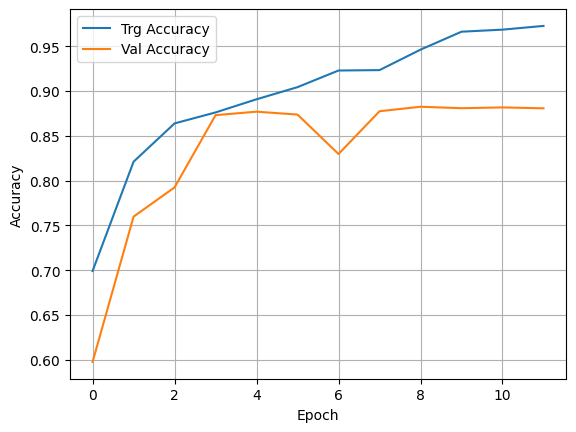

In [78]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [79]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

313/313 [==============================] - 2s 7ms/step


              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4989
           1       0.87      0.90      0.88      5011

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



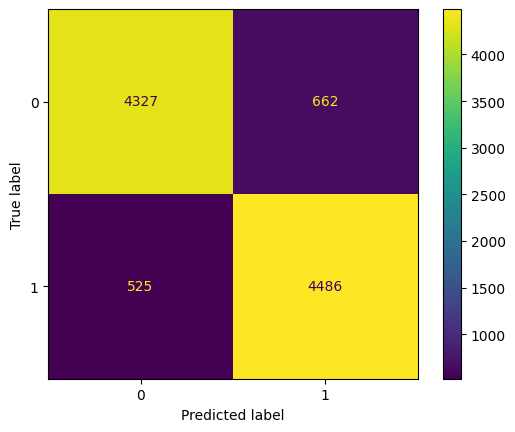

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred);

***
### Movie Review Classification Using an Embedding Layer
**Tensorflow Text Vectorization and LSTM network**  

In [81]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [82]:
max([len(review) for review in X])

13704

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [84]:
X_train

47999    Yikes.<br /><br />I've seen quite a few bad mo...
42972    This has to be the most brutally unfunny "come...
12685    This is the biggest pile of crap I have ever w...
8037     This is a comedy of morals, so occasionally a ...
29362    Normally I don't bother wasting my time writin...
                               ...                        
40269    This movie was a littttle confusing at first. ...
27776    What a mess!! Why was this movie made? This, a...
45416    This film is awful. The screenplay is bad, the...
43223    I first saw this film when i was about 13. It ...
12694    Mighty Morphin Power Rangers came out in 1993,...
Name: review, Length: 40000, dtype: object

**Next, we convert our text data into arrays that neural nets can consume.  
These will be used by the several different architectures we will try next.**  

In [85]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

import numpy as np

maxlen=500  # how many words to take from each text
vocab_size=20000 # the size of our vocabulary

# First, we tokenize our training text
tokenizer = Tokenizer(num_words = vocab_size, oov_token='[UNK]')
tokenizer.fit_on_texts(X_train)

# Create sequences and then the X_train vector
sequences_train = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))
X_train = pad_sequences(sequences_train, maxlen = maxlen)

# Same thing for the y_train vector
sequences_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences_test, maxlen = maxlen)

# let us encode the labels as 0s and 1s instead of positive and negative
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train = le.fit_transform(y_train.values.ravel()) # This needs a 1D array
y_test = le.fit_transform(y_test.values.ravel()) # This needs a 1D array

# Enumerate Encoded Classes
print('Classes', dict(list(enumerate(le.classes_))), '\n')

# Now our y variable contains numbers.  Let us one-hot them using Label Binarizer
# from sklearn.preprocessing import LabelBinarizer
# lb = LabelBinarizer()
# y_train = lb.fit_transform(y_train) 
# y_test = lb.fit_transform(y_test) 


print('Shape of X_train tensor', X_train.shape)
print('Shape of y_train tensor', y_train.shape)
print('Shape of X_test tensor', X_test.shape)
print('Shape of y_test tensor', y_test.shape)






Found 112353 unique tokens
Classes {0: 'negative', 1: 'positive'} 

Shape of X_train tensor (40000, 500)
Shape of y_train tensor (40000,)
Shape of X_test tensor (10000, 500)
Shape of y_test tensor (10000,)


In [86]:
# We can print the word index if we wish to, 
# but be aware it will be a long list

# print(tokenizer.word_index)

In [87]:
X_train[np.random.randint(0,len(X_train))]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [88]:
pd.DataFrame(X_train).sample(6).reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,10,62,19298,2,1228,3033,5,2,210,16
1,0,0,0,0,0,0,0,0,0,0,...,3,1,587,4753,125,2,2947,4,144,5443
2,0,0,0,0,0,0,0,0,0,0,...,217,36,100,207,20,5,2,238,4419,154
3,0,0,0,0,0,0,0,0,0,0,...,858,13,34,1212,5477,32,4,127,570,167
4,0,0,0,0,0,0,0,0,0,0,...,76,13,45,161,431,92,104,50,430,430
5,0,0,0,0,0,0,0,0,0,0,...,2859,619,7223,295,9,33,915,460,342,16


In [89]:
word_index['the']

2

**Build the model**  

In [90]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN, Dropout


In [91]:
vocab_size=20000 # vocab size
embedding_dim = 100 # 100 dense vector for each word from Glove
max_len = 350 # using only first 100 words of each review

In [92]:
# In this model, we do not use pre-trained embeddings, but let the machine train the embedding weights too
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim)) 
# Note that vocab_size=20000 (vocab size), 
# embedding_dim = 100 (100 dense vector for each word from Glove), 
# maxlen=350 (using only first 100 words of each review)
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         2000000   
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2017057 (7.69 MB)
Trainable params: 2017057 (7.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


***
**Know that the model in the next cell will take over 30 minutes to train!**

In [93]:
%%time
callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=2, batch_size=1024, validation_split=0.2, callbacks=[callback])


Epoch 1/2
32/32 [==============================] - 60s 2s/step - loss: 0.6901 - acc: 0.5576 - val_loss: 0.6836 - val_acc: 0.5986
Epoch 2/2
32/32 [==============================] - 57s 2s/step - loss: 0.6345 - acc: 0.6667 - val_loss: 0.5355 - val_acc: 0.7591
CPU times: user 2min 43s, sys: 35.3 s, total: 3min 18s
Wall time: 1min 56s


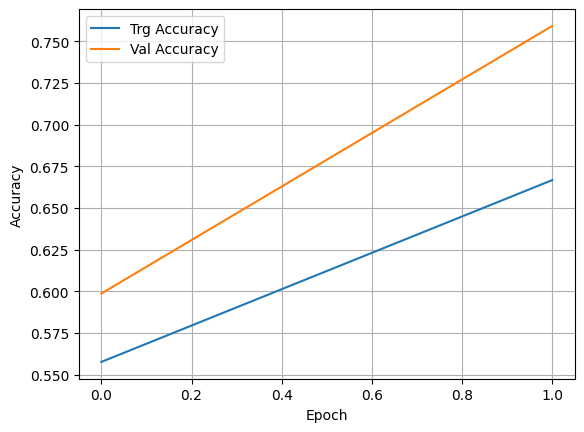

In [94]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [95]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

313/313 [==============================] - 10s 31ms/step


              precision    recall  f1-score   support

           0       0.75      0.72      0.74      5003
           1       0.73      0.76      0.75      4997

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



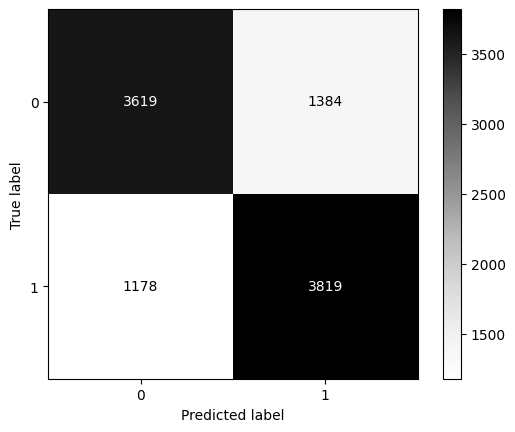

In [96]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred,cmap='Greys');

**Now imagine you are trying to extract the embedding layer that was just trained.**

In [97]:
extracted_embeddings = model.layers[0].get_weights()[0]

In [98]:
extracted_embeddings.shape

(20000, 100)

**Let us look at one embedding for the word king**  

In [99]:
word_index['king']

788

In [100]:
extracted_embeddings[786]

array([ 0.04833313,  0.03949632, -0.03808209, -0.06621675, -0.02320995,
       -0.01216606, -0.04651737, -0.00220701, -0.03714195, -0.0384903 ,
        0.01506517,  0.01288307, -0.002795  ,  0.03382915,  0.04397811,
       -0.06299973, -0.01701448,  0.04888786,  0.02825973,  0.04816236,
       -0.02864782, -0.03678944,  0.03003286, -0.00901289, -0.0062958 ,
        0.06760396,  0.02048134,  0.04103988,  0.04287264,  0.0603344 ,
       -0.02911668, -0.03594466, -0.02793844, -0.03453871, -0.01818721,
        0.01963778,  0.00610985,  0.03717578,  0.01138412, -0.04534264,
        0.02494474, -0.0423395 , -0.00101255,  0.01871159,  0.0119822 ,
        0.01650572, -0.06028067,  0.05636913, -0.026044  , -0.07851591,
       -0.05660687, -0.03028961, -0.01418429, -0.00684351,  0.0240099 ,
        0.00329316, -0.00825657,  0.03063302,  0.02102142, -0.04486975,
        0.00560355, -0.0062394 , -0.04209257, -0.0562508 ,  0.02857322,
       -0.00894558,  0.05180286, -0.01024618, -0.02629694,  0.02

**Predicting for a new review**

In [101]:
new_review = 'The movie is awful garbage hopeless useless no good'
sequenced_review = tokenizer.texts_to_sequences([new_review])
sequenced_review

[[2, 16, 7, 366, 1187, 4754, 3109, 55, 50]]

In [102]:
padded_review = pad_sequences(sequenced_review, maxlen = maxlen)
predicted_class = model.predict(padded_review)
predicted_class

1/1 [==============================] - 0s 27ms/step


array([[0.6639557]], dtype=float32)

In [103]:
pred = (predicted_class>0.5)*1
int(pred)

1

In [104]:
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [105]:
dict(list(enumerate(le.classes_)))[int(pred)]

'positive'

***
### Movie Review Classification Using Pre-trained Glove Embeddings

**First, load the Glove embeddings**

In [106]:
pwd

'/home/instructor/shared'

In [107]:
embeddings_index = {}

# f=open(r"C:\Users\user\Google Drive\glove.6B\glove.6B.100d.txt", encoding="utf8") # For personal machine
f=open(r"/home/instructor/shared/glove.6B.100d.txt", encoding="utf8") # For Jupyterhub at NYU
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s words and corresponding vectors' % len(embeddings_index))
vocab_size = len(embeddings_index)

Found 400000 words and corresponding vectors


In [108]:
# Print the embeddings_index (if needed)

# embeddings_index

In [109]:
embeddings_index['the']

array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
       -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
        0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
       -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
        0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
       -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
        0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
        0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
       -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
       -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
       -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
       -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
       -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
       -1.2526  ,  0.071624,  0.70565 ,  0.49744 , 

In [110]:
len(embeddings_index.get('security'))

100

In [111]:
print(embeddings_index.get('th13e'))

None


In [112]:
y_test

array([1, 0, 0, ..., 0, 0, 1])

In [113]:
list(embeddings_index.keys())[3]

'of'

In [114]:
vocab_size

400000

In [115]:
# Create the embedding matrix based on Glove
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for i, word in enumerate(list(embeddings_index.keys())):
    # print(word,i)
    if i < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            

In [116]:
embedding_matrix.shape

(400000, 100)

In [117]:
embedding_matrix[0]

array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.22

At this point the `embedding_matrix` has one row per word in the vocabulary.  Each row has the vector for that word, picked from glove.  Because it is an np.array, it has no row or column names. The order of the words in the rows is the same as the order of words in the dict embeddings_index.  
  
We will feed this embedding matrix as weights to the embedding layer.  
  
**Build the model:**    

In [118]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, LSTM, SimpleRNN, Dropout


In [119]:
# let us use pretrained Glove embeddings

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim,
                    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
                    trainable=False,mask_zero=True )) # Note that vocab_size=20000 (vocab size), embedding_dim = 100 (100 dense vector for each word from Glove), maxlen=350 (using only first 100 words of each review)
model.add(LSTM(32, name='LSTM_Layer'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         40000000  
                                                                 
 LSTM_Layer (LSTM)           (None, 32)                17024     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 40017057 (152.65 MB)
Trainable params: 17057 (66.63 KB)
Non-trainable params: 40000000 (152.59 MB)
_________________________________________________________________


In [120]:
# Takes 30 minutes to train

callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=3)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=2, batch_size=1024, validation_split=0.2, callbacks=[callback])


Epoch 1/2
32/32 [==============================] - 60s 2s/step - loss: 0.6915 - acc: 0.5296 - val_loss: 0.6820 - val_acc: 0.5600
Epoch 2/2
32/32 [==============================] - 59s 2s/step - loss: 0.6785 - acc: 0.5676 - val_loss: 0.6767 - val_acc: 0.5592


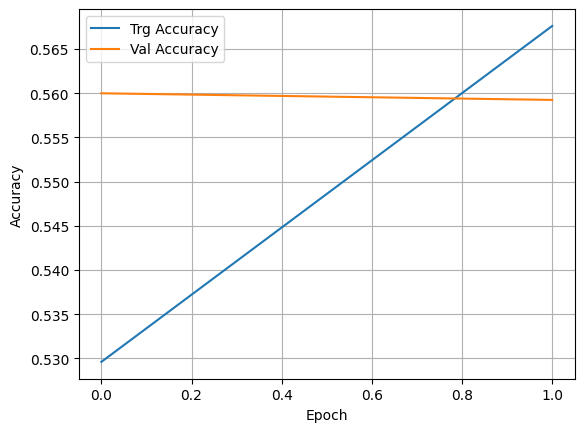

In [121]:
plt.plot(history.history['acc'], label='Trg Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [122]:
pred = model.predict(X_test)
pred =  (pred>.5)*1

313/313 [==============================] - 14s 41ms/step


              precision    recall  f1-score   support

           0       0.64      0.21      0.31      5003
           1       0.53      0.88      0.66      4997

    accuracy                           0.55     10000
   macro avg       0.58      0.55      0.49     10000
weighted avg       0.58      0.55      0.49     10000



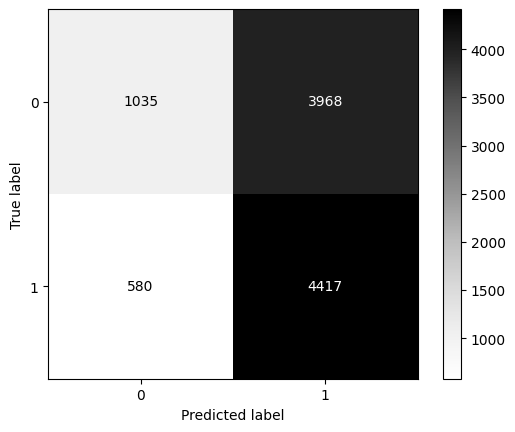

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,  ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred=pred,cmap='Greys');

***
**CAREFUL WHEN RUNNING ON JUPYTERHUB!!!**
Jupyterhub may crash, or will not have the storage space to store the pretrained models.  If you wish to test this out, run it on your own machine.

## Word2Vec
### Using pre-trained embeddings

In [124]:
import os
os.environ['GENSIM_DATA_DIR'] = '/home/instructor/shared/gensim'

In [125]:
# Source: https://radimrehurek.com/gensim/auto_examples/howtos/run_downloader_api.html

import gensim.downloader as api
info = api.info()

for model_name, model_data in sorted(info['models'].items()):
    print(
        '- %s (%d records): %s' % (
            model_name,
            model_data.get('num_records', -1),
            model_data['description'],
        )
    )

- __testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors of the movie matrix.
- conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state-of-the-art semantic vectors (also known as word embeddings) that can be used directly as a representation of word meanings or as a starting point for further machine learning. ConceptNet Numberbatch is part of the ConceptNet open data project. ConceptNet provides lots of ways to compute with word meanings, one of which is word embeddings. ConceptNet Numberbatch is a snapshot of just the word embeddings. It is built using an ensemble that combines data from ConceptNet, word2vec, GloVe, and OpenSubtitles 2016, using a variation on retrofitting.
- fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).
- glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets, 

In [126]:
import gensim.downloader as api
wv = api.load('glove-wiki-gigaword-50')

[==================================================] 100.0% 66.0/66.0MB downloaded


In [127]:
wv.similarity('ship', 'boat')

0.89015037

In [128]:
wv.similarity('up', 'down')

0.9523452

In [129]:
wv.most_similar(positive=['car'], topn=5)

[('truck', 0.92085862159729),
 ('cars', 0.8870189785957336),
 ('vehicle', 0.8833683729171753),
 ('driver', 0.8464019298553467),
 ('driving', 0.8384189009666443)]

In [130]:
# king - queen = princess - prince
# king = + queen + princess - prince
wv.most_similar(positive=['queen', 'prince'], negative = ['princess'], topn=5)

[('king', 0.8574749827384949),
 ('patron', 0.7256798148155212),
 ('crown', 0.7167519330978394),
 ('throne', 0.7129824161529541),
 ('edward', 0.7081639170646667)]

In [131]:
wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car'])

'car'

In [132]:
wv['car'].shape

(50,)

In [133]:
wv['car']

array([ 0.47685 , -0.084552,  1.4641  ,  0.047017,  0.14686 ,  0.5082  ,
       -1.2228  , -0.22607 ,  0.19306 , -0.29756 ,  0.20599 , -0.71284 ,
       -1.6288  ,  0.17096 ,  0.74797 , -0.061943, -0.65766 ,  1.3786  ,
       -0.68043 , -1.7551  ,  0.58319 ,  0.25157 , -1.2114  ,  0.81343 ,
        0.094825, -1.6819  , -0.64498 ,  0.6322  ,  1.1211  ,  0.16112 ,
        2.5379  ,  0.24852 , -0.26816 ,  0.32818 ,  1.2916  ,  0.23548 ,
        0.61465 , -0.1344  , -0.13237 ,  0.27398 , -0.11821 ,  0.1354  ,
        0.074306, -0.61951 ,  0.45472 , -0.30318 , -0.21883 , -0.56054 ,
        1.1177  , -0.36595 ], dtype=float32)

In [134]:
# # Create the embedding matrix based on Word2Vec
# # The code below is to be used if Word2Vec based embedding is to be applied
# embedding_dim = 300
# embedding_matrix = np.zeros((vocab_size, embedding_dim))
# for word, i in word_index.items():
#     if i < vocab_size:
#         try:
#             embedding_vector = wv[word]
#         except:
#             pass
#         if embedding_vector is not None:
#             embedding_matrix[i] = embedding_vector
 

### Train your own Word2Vec model

Source: https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf

2023-11-18 11:48:53.235916: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 11:48:53.678170: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 11:48:53.681981: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-18 11:48:56.554695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
text = X.str.split()
text

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production., <br, /><br...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there's, a, family, where, a, litt...
4        [Petter, Mattei's, "Love, in, the, Time, of, M...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot,, bad, dialogue,, bad, acting,, idi...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I'm, going, to, have, to, disagree, with, the...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

In [4]:
%%time
import gensim.models
# Next, you train the model.  Lots of parameters available.  The default model type
# is CBOW, which you can change to SG by setting sg=1

model = gensim.models.Word2Vec(sentences=text, vector_size=100)

CPU times: user 2min 1s, sys: 1.34 s, total: 2min 2s
Wall time: 1min 10s


In [5]:
for index, word in enumerate(model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(model.wv.index_to_key)} is {word}")

word #0/76833 is the
word #1/76833 is a
word #2/76833 is and
word #3/76833 is of
word #4/76833 is to
word #5/76833 is is
word #6/76833 is in
word #7/76833 is I
word #8/76833 is that
word #9/76833 is this


In [6]:
model.wv.most_similar(positive=['plot'], topn=5)

[('storyline', 0.8488069176673889),
 ('story', 0.806993305683136),
 ('plot,', 0.7981663942337036),
 ('premise', 0.7432560920715332),
 ('script', 0.7301014065742493)]

In [7]:
model.wv.most_similar(positive=['picture'], topn=5)

[('film', 0.7454642057418823),
 ('movie', 0.6850423812866211),
 ('film,', 0.6498767137527466),
 ('picture,', 0.6489506363868713),
 ('picture.', 0.6283954381942749)]

In [8]:
model.wv.doesnt_match(['violence', 'comedy', 'hollywood', 'action', 'tragedy', 'mystery'])

'hollywood'

In [9]:
model.wv['car']

array([ 3.8394017 , -0.5835624 , -2.3103628 ,  0.33122042,  2.6951988 ,
        1.1748388 ,  1.454376  ,  1.152262  ,  1.4738321 ,  0.3078149 ,
        3.6991591 , -1.5658033 , -1.5195733 , -1.6743966 , -0.74527407,
        0.11029212,  0.53643715,  0.71285343,  2.75281   , -1.4234633 ,
       -0.21179363, -2.1421173 , -0.81895417,  0.7846664 ,  0.7491998 ,
       -1.7718456 ,  0.1568823 ,  1.5379242 , -1.0498992 ,  2.8575933 ,
       -0.31375456, -0.99572873, -1.8847903 , -1.926706  , -0.11694951,
        0.2986317 ,  1.5809852 ,  1.6263276 ,  0.41387427, -0.2566973 ,
       -0.2873027 , -1.9555585 ,  0.7602351 ,  0.91946167,  0.03934835,
       -2.6839004 , -3.5320113 , -0.63825685,  0.17143616, -1.3851151 ,
       -3.031802  , -0.87808275, -1.9553418 , -1.3526833 , -0.5691928 ,
       -1.0294499 , -0.81099236, -1.515322  ,  0.7158981 ,  0.9174229 ,
       -1.6294522 , -0.49834198, -0.47476974,  1.067329  , -0.6831994 ,
        0.53741044,  1.173884  ,  0.5532072 , -1.2770351 ,  0.38

In [10]:
# model.wv.key_to_index 

list(model.wv.key_to_index.items())[:20]

[('the', 0),
 ('a', 1),
 ('and', 2),
 ('of', 3),
 ('to', 4),
 ('is', 5),
 ('in', 6),
 ('I', 7),
 ('that', 8),
 ('this', 9),
 ('it', 10),
 ('/><br', 11),
 ('was', 12),
 ('as', 13),
 ('with', 14),
 ('for', 15),
 ('The', 16),
 ('but', 17),
 ('on', 18),
 ('movie', 19)]

In [11]:
model.wv.index_to_key[:20]

['the',
 'a',
 'and',
 'of',
 'to',
 'is',
 'in',
 'I',
 'that',
 'this',
 'it',
 '/><br',
 'was',
 'as',
 'with',
 'for',
 'The',
 'but',
 'on',
 'movie']

### Identify text that is similar

We will calculate the similarity between vectors to identify the most similar reviews.

Before we do it for everything, let us pick two random reviews and compute the similarity between them.

To make things simpler, first let us reduce the size of our dataset to 5,000 reviews (instead of 50,000)

In [12]:
df = df.sample(5000) # We limit, for illustration, to 1000 random reviews

In [13]:
df.review.iloc[2]

'Although I can see the potentially redeeming qualities in this film by way of it\'s intrigue, I most certainly thought that the painfully long nature in the way the scene structure played out was too much to ask of most viewers. Enormous holes in the screenplay such as the never explained "your father died today" comment by the mother made it even harder to try to make sense of these characters.<br /><br />This won first place at Cannes in 2001 which is a shock considering. Perhaps the French had been starved for film noir that year and were desperate for something as sadistic as this film. I understood the long scenes as a device to keep the viewer as uncomfortable as possible but when matched with the inability to relate to the main character it went too far for me and kept me at arms distance from the story altogether.<br /><br />This is a film for only the most dedicated fan of film noir and one who expects no gratification from having watched a film once it\'s over. I LOVED movie

In [14]:
df.review.iloc[20]

'Outstanding performance by Tantoo Cardinal. She carries this movie alone. Rip Torn is great but just a shadow to Tantoo. A bitter sweet story of a woman who loves a very stubborn man. Beautiful, funny, sad, touching, a must see film.'

In [15]:
# We take the above reviews and split by word, and put them in a list
# Word2vec will need these as a list

first = [x for x in df.review.iloc[2].split() if x in model.wv.key_to_index]
second = [x for x in df.review.iloc[20].split() if x in model.wv.key_to_index]

In [16]:
print(first)

['Although', 'I', 'can', 'see', 'the', 'potentially', 'redeeming', 'qualities', 'in', 'this', 'film', 'by', 'way', 'of', "it's", 'intrigue,', 'I', 'most', 'certainly', 'thought', 'that', 'the', 'painfully', 'long', 'nature', 'in', 'the', 'way', 'the', 'scene', 'structure', 'played', 'out', 'was', 'too', 'much', 'to', 'ask', 'of', 'most', 'viewers.', 'holes', 'in', 'the', 'screenplay', 'such', 'as', 'the', 'never', 'explained', '"your', 'father', 'died', 'comment', 'by', 'the', 'mother', 'made', 'it', 'even', 'harder', 'to', 'try', 'to', 'make', 'sense', 'of', 'these', 'characters.<br', '/><br', '/>This', 'won', 'first', 'place', 'at', 'Cannes', 'in', '2001', 'which', 'is', 'a', 'shock', 'considering.', 'Perhaps', 'the', 'French', 'had', 'been', 'starved', 'for', 'film', 'noir', 'that', 'year', 'and', 'were', 'desperate', 'for', 'something', 'as', 'sadistic', 'as', 'this', 'film.', 'I', 'understood', 'the', 'long', 'scenes', 'as', 'a', 'device', 'to', 'keep', 'the', 'viewer', 'as', 'unc

In [17]:
print(second)

['Outstanding', 'performance', 'by', 'Tantoo', 'She', 'carries', 'this', 'movie', 'alone.', 'Rip', 'Torn', 'is', 'great', 'but', 'just', 'a', 'shadow', 'to', 'A', 'bitter', 'sweet', 'story', 'of', 'a', 'woman', 'who', 'loves', 'a', 'very', 'stubborn', 'man.', 'Beautiful,', 'funny,', 'sad,', 'touching,', 'a', 'must', 'see', 'film.']


In [18]:
# Get similarity score using n_similarity
# The default distance measure is cosine similarity

model.wv.n_similarity(first, second)

0.69402325

In [19]:
# For every word, we can get a vector

model.wv.get_vector('If')

array([ 0.40416554,  1.1661724 , -3.2808275 ,  2.797683  ,  1.6560869 ,
        2.1763396 ,  2.9824426 , -0.5862631 , -1.1949389 ,  1.9076872 ,
        0.29634064,  1.6551627 ,  2.477216  ,  1.2075315 ,  0.3282819 ,
        4.232538  ,  0.07619317, -0.42345437,  1.6156824 ,  3.2599533 ,
        2.2126312 ,  2.8527946 ,  3.8550625 , -3.1654162 ,  0.3060025 ,
       -1.7541852 , -2.8835194 , -1.3392761 ,  0.3544551 ,  2.5814013 ,
        2.9631832 , -1.7510808 ,  0.92105883,  0.82430816,  1.1127902 ,
        4.21966   , -3.7110283 ,  0.31791705,  0.5692714 , -2.6044996 ,
       -2.3415864 , -2.8909514 ,  1.4776398 ,  4.52524   , -0.2712174 ,
        2.6932878 , -3.1168978 , -3.975336  , -2.395123  , -0.13372783,
       -0.30658582, -0.43764493, -1.0916378 ,  2.5784645 , -1.2398702 ,
       -4.979113  , -0.4080843 ,  2.516163  ,  0.9403168 , -1.7912037 ,
        1.209625  , -0.8095642 , -3.1459558 ,  1.539639  , -3.241197  ,
        1.1628352 , -0.78180486, -0.7571644 ,  4.966084  ,  3.83

In [20]:
# For every sentence, we can get a combined vector 

model.wv.get_mean_vector(first, pre_normalize = False, post_normalize = True)

array([-0.01451544, -0.03740427, -0.03779475,  0.08832569, -0.01442034,
        0.01362155,  0.03434285, -0.1752315 ,  0.19039325, -0.13331246,
        0.18939033,  0.0618043 ,  0.01666737,  0.02530705, -0.02910913,
       -0.04040439, -0.02737056, -0.10981317,  0.10970519,  0.03942514,
       -0.14643255,  0.0340992 ,  0.06212853, -0.03892062, -0.18323435,
       -0.23742372, -0.11965851,  0.07065635,  0.11919948,  0.04166581,
       -0.03889548,  0.04286876, -0.09003014,  0.03431519, -0.00434023,
        0.04535564,  0.10817406, -0.16195048,  0.06630825, -0.08305347,
       -0.1034325 ,  0.12998025, -0.22036159,  0.11703641, -0.0153263 ,
        0.0485523 ,  0.01438542, -0.00894713,  0.03945787, -0.10250321,
        0.03918897,  0.1012472 , -0.05466026, -0.07544509,  0.1372273 ,
        0.1576641 ,  0.01067788,  0.13803266, -0.10732381, -0.12016244,
       -0.05278284,  0.01280772, -0.08062163, -0.04176704, -0.00540129,
       -0.0832702 ,  0.05331978,  0.00201168, -0.11222977,  0.01

In [21]:
# Get a single mean pooled vector for an entire review

first_vector = model.wv.get_mean_vector(first, pre_normalize = False, post_normalize = True)
second_vector = model.wv.get_mean_vector(second, pre_normalize = False, post_normalize = True)

In [22]:
# Cosine similarity is just the dot product of the two vectors

np.dot(first_vector, second_vector)

0.69402325

In [23]:
# We can get the same thing manually too

x = np.empty([0,100])
for word in first:
    x = np.vstack([x, model.wv.get_vector(word)])
x.mean(axis = 0)/ np.linalg.norm(x.mean(axis = 0), 2) # L2 normalization

array([-0.01451545, -0.03740425, -0.03779473,  0.08832568, -0.01442033,
        0.01362155,  0.03434285, -0.1752316 ,  0.19039325, -0.13331242,
        0.18939033,  0.06180429,  0.01666737,  0.02530705, -0.02910913,
       -0.04040437, -0.02737056, -0.10981317,  0.10970521,  0.03942515,
       -0.14643258,  0.0340992 ,  0.06212851, -0.0389206 , -0.18323437,
       -0.23742369, -0.11965849,  0.07065629,  0.11919948,  0.04166581,
       -0.03889546,  0.04286877, -0.09003012,  0.03431517, -0.00434023,
        0.04535564,  0.10817404, -0.16195042,  0.06630824, -0.08305346,
       -0.10343247,  0.12998032, -0.2203616 ,  0.11703639, -0.01532629,
        0.04855226,  0.01438542, -0.00894713,  0.03945787, -0.10250322,
        0.03918897,  0.10124722, -0.05466026, -0.07544507,  0.13722728,
        0.15766412,  0.01067787,  0.13803263, -0.10732384, -0.12016245,
       -0.05278283,  0.01280772, -0.08062166, -0.04176704, -0.00540129,
       -0.08327021,  0.05331978,  0.00201168, -0.11222978,  0.01

**Next, we calculate the cosine similarity matrix between all the reviews**

In [24]:
# We can calculate cosine similarity between all reviews
# To do that, let us first convert each review to a vector
# We loop through each review, and get_mean_vector

vector_df = np.empty([0,100])
for review in df.review:
    y = [x for x in review.split() if x in model.wv.key_to_index]
    vector_df = np.vstack([vector_df, model.wv.get_mean_vector(y)])

vector_df.shape



(5000, 100)

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

distance_matrix = cosine_similarity(vector_df)

In [26]:
dist_df = pd.DataFrame(distance_matrix)
dist_df

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.000000,0.831139,0.913957,0.838501,0.868264,0.911942,0.899740,0.923268,0.858595,0.884878,...,0.916671,0.930124,0.898714,0.783082,0.891791,0.875848,0.880388,0.756290,0.877771,0.912308
1,0.831139,1.000000,0.769525,0.831574,0.777161,0.875271,0.703240,0.857807,0.778089,0.862652,...,0.861870,0.790755,0.804351,0.832819,0.736434,0.784302,0.803885,0.760091,0.725277,0.779817
2,0.913957,0.769525,1.000000,0.734186,0.918771,0.879549,0.859242,0.922175,0.880594,0.882461,...,0.914324,0.905026,0.876686,0.762395,0.882841,0.872181,0.900043,0.722612,0.890356,0.934458
3,0.838501,0.831574,0.734186,1.000000,0.736189,0.839953,0.785812,0.805598,0.741241,0.780871,...,0.815100,0.825293,0.752986,0.723765,0.763781,0.678241,0.756176,0.782454,0.723833,0.790020
4,0.868264,0.777161,0.918771,0.736189,1.000000,0.888727,0.830125,0.908168,0.881634,0.932378,...,0.892868,0.858703,0.808705,0.818446,0.865255,0.838583,0.925048,0.781102,0.833844,0.924249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.875848,0.784302,0.872181,0.678241,0.838583,0.838620,0.727523,0.911693,0.764735,0.879600,...,0.858257,0.797871,0.802949,0.874639,0.762385,1.000000,0.834648,0.689658,0.789433,0.802898
4996,0.880388,0.803885,0.900043,0.756176,0.925048,0.843504,0.876582,0.887038,0.872247,0.891364,...,0.887911,0.862572,0.826662,0.764702,0.877703,0.834648,1.000000,0.801707,0.898521,0.923935
4997,0.756290,0.760091,0.722612,0.782454,0.781102,0.802567,0.757555,0.758808,0.754900,0.794561,...,0.743657,0.776001,0.659941,0.749728,0.793053,0.689658,0.801707,1.000000,0.717982,0.802754
4998,0.877771,0.725277,0.890356,0.723833,0.833844,0.799232,0.895424,0.826891,0.852855,0.798514,...,0.832827,0.832285,0.848275,0.653185,0.833978,0.789433,0.898521,0.717982,1.000000,0.877973


**The above is in a format that is difficult to read.  So we rearrange it in pairs of reviews that we can sort etc.  SInce there are 5000 reviews, there will be 5000 x 5000 = 25000000 (ie 25 million) pairs of distances.**

In [27]:
# We use stack to arrange all distances next to each other

dist_df.stack()

0     0       1.000000
      1       0.831139
      2       0.913957
      3       0.838501
      4       0.868264
                ...   
4999  4995    0.802898
      4996    0.923935
      4997    0.802754
      4998    0.877973
      4999    1.000000
Length: 25000000, dtype: float64

In [28]:
# We clean up the above an put things in a nice to read dataframe
# Once we have done that, we can sort and find similar reviews.

pairwise_distance = pd.DataFrame(dist_df.stack(),).reset_index()
pairwise_distance.columns = ['original_text_id', 'similar_text_id', 'distance']
pairwise_distance

,original_text_id,similar_text_id,distance
0,0,0,1.000000
1,0,1,0.831139
2,0,2,0.913957
3,0,3,0.838501
4,0,4,0.868264
...,...,...,...
24999995,4999,4995,0.802898
24999996,4999,4996,0.923935
24999997,4999,4997,0.802754
24999998,4999,4998,0.877973


In [29]:
df.review.iloc[0]

"I'm watching this on the Star World network overseas which buys American and Canadian series that last one or two seasons like The Jane Show. I thought of how many female lead comedy shows Im actually able to watch on my own, There's Lucy, Bewitched, I Dream Of Jeanie (the one with Barbara Feldman), and then my mind goes kind of blank I cannot think of any others, the women are all supporting roles not the lead. So for me, The Jane Show is in pretty good company. One thing I just thought of though. I've watched several things made in Canada, and I never recall any thing being filmed in a regular TV series that shows SNOW! It's all made at the height of summer, LOL! Granted it's a great place to live climate wise in the summer but you would THINK, they would show a little bit of Canada in the winter since that's part of the lifestyle there also. I mean SCTV, Just For Laughs come to mind as two comedy shows that lasted a long time filmed in Canada and very little or none is shot with sn

In [30]:
df.review.iloc[1]

"I have only seen Gretchen Mol in two other films (Girl 6, Donnie Brasco), and don't really remember her, but she did a great job as a naive girl who posed for pictures because it made people happy.<br /><br />She really didn't think what she was doing was wrong, even when she left the business and found her religion again.<br /><br />The photos she made were certainly tame by today's standards, and it is funny seeing men with cameras get all excited, and politicians pontificating on the evils of pornography. David Strathairn (Good Night, and Good Luck) played a super part here.<br /><br />Mary Harron (American Psycho) wrote and directed an outstanding biopic of the most famous pinup girl ever."

### kMeans clustering with Word2Vec

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [32]:
# All our review vectors are in vector_df
print(vector_df.shape)
vector_df

(5000, 100)


array([[ 7.15497208e-06, -2.36130469e-02, -8.28677975e-03, ...,
         2.95968493e-03, -2.54244469e-02,  2.15578582e-02],
       [-2.92380713e-03,  1.56198284e-02,  9.40618664e-03, ...,
        -2.13045832e-02, -2.41991896e-02,  9.01173148e-03],
       [-1.57558527e-02, -4.95057832e-03, -1.94846261e-02, ...,
         2.23362017e-02, -2.49518938e-02,  2.66604628e-02],
       ...,
       [ 3.09985112e-02, -2.32769325e-02, -2.41367444e-02, ...,
         2.38023493e-02, -3.24589796e-02,  1.70822181e-02],
       [-3.32076359e-03,  2.89337663e-03, -1.54057844e-02, ...,
         3.44171152e-02, -4.79114726e-02,  2.53723431e-02],
       [ 2.62434804e-03, -2.50130128e-02, -1.68365538e-02, ...,
         1.45984543e-02, -3.12271398e-02,  2.86973957e-02]])

In [33]:
kmeans = KMeans(2, n_init='auto')
clusters = kmeans.fit_predict(vector_df)

In [34]:
df['clusters'] = clusters
df

,review,sentiment,clusters
29633,I'm watching this on the Star World network ov...,positive,1
45909,I have only seen Gretchen Mol in two other fil...,negative,0
49196,Although I can see the potentially redeeming q...,negative,1
40326,"Dooley and his canine partner, Jerry Lee are t...",negative,1
179,This movie was a failure as a comedy and a fil...,negative,1
...,...,...,...
25928,A stunning and thoughtful observation on moder...,positive,0
7941,Jack Black can usually make me snicker simply ...,negative,1
45337,Why did they have to waste money on this crap?...,negative,1
35585,"Ti%s and As*, lots of boobies. Some great char...",positive,1


In [35]:
pd.crosstab(index = df['sentiment'], 
            columns = df['clusters'], margins=True)

clusters,0,1,All
sentiment,,,
negative,944,1566,2510
positive,1358,1132,2490
All,2302,2698,5000


#### Right number of clusters
kmeans score is a measure of how far the data points are from the cluster centroids, expressed as a negative number.  The closer it is to zero, the better it is.  Of course, if we have the number of clusters equal to the number of observations, the score will be zero as each point will be its own centroid, with a sum of zero.  If we have only one cluster, we will have a large negative score.  

The ideal number of clusters is somewhere when we start getting diminished returns to adding more clusters.  We can run the kmeans algorithm for a range of cluster numbers, and compare the score.  

KMeans works by minimizing the sum of squared distance of each observation to their respective cluster center.  In an extreme situation, all observations would coincide with their centroid center, and the sum of squared distances will be zero.

With sklearn, we can get sum of squared distances of samples to their closest cluster center using _model_name.intertia__.  

The negative of inertia_ is model_name.score(x), where x is the dataset kmeans was fitted on.

##### Elbow Method  
The elbow method tracks the sum of squares against the number of clusters, and we can make a subjective judgement on the appropriate number of clusters based on graphing the sum of squares as below.  The sum of squares is calculated using the distance between cluster centers and each observation in that cluster.  As an extreme case, when the number of clusters is equal to the number of observations, the sum of squares will be zero.



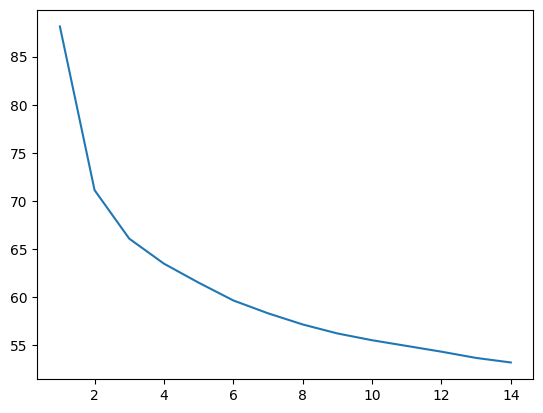

In [36]:
num_clusters = []
score = []
for cluster_count in range(1,15):
    kmeans = KMeans(cluster_count, n_init='auto')
    kmeans.fit(vector_df)
    kmeans.score(vector_df)
    num_clusters.append(cluster_count)
    # score.append(kmeans.score(x)) # score is just the negative of inertia_
    score.append(kmeans.inertia_)

plt.plot(num_clusters, score)

In [37]:
print(kmeans.score(vector_df))
kmeans.inertia_

-53.218901608992844


53.218901608992844

In [38]:
# Alternative way of listing labels for the training data
kmeans.labels_

array([ 0,  6,  4, ...,  2, 10, 10], dtype=int32)

##### Silhouette Plot  
The silhouette plot is a measure of how close each point in one cluster is to points in the neighboring clusters.  It provides a visual way to assess parameters such as the number of clusters visually.  It does so using the silhouette coefficient.

Silhouette coefficient - This measure has a range of [-1, 1].  Higher the score the better, so +1 is the best result.

The silhouette coefficient is calculated individually for every observation in a cluster as follows:  (b - a) / max(a, b). 'b' is the distance between a sample and the nearest cluster that the sample is not a part of.  'a' is the distance between the sample and the cluster it is a part of.  One would expect b - a to be a positive number, but if it is not, then likely the point is misclassified.

`sklearn.metrics.silhouette_samples(X)` - gives the silhouette coefficient for every point in X.  
`sklearn.metrics.silhouette_score(X)` - gives mean of the above.

The silhouette plot gives the mean (ie silhouette_score) as a red vertical line for the entire dataset for all clusters.  Then each cluster is presented as a sideways histogram of the distances of each of the datapoints.  The fatter the representation of a cluster, the more datapoints are included in that cluster. 

Negative points on the histogram indicate misclassifications that may be difficult to correct as moving them changes the centroid center.



For n_clusters = 2 The average silhouette_score is : 0.16634560133830648
For n_clusters = 3 The average silhouette_score is : 0.09972510143282727
For n_clusters = 4 The average silhouette_score is : 0.08042407678902448
For n_clusters = 5 The average silhouette_score is : 0.06939899253541224
For n_clusters = 6 The average silhouette_score is : 0.06458525018970017


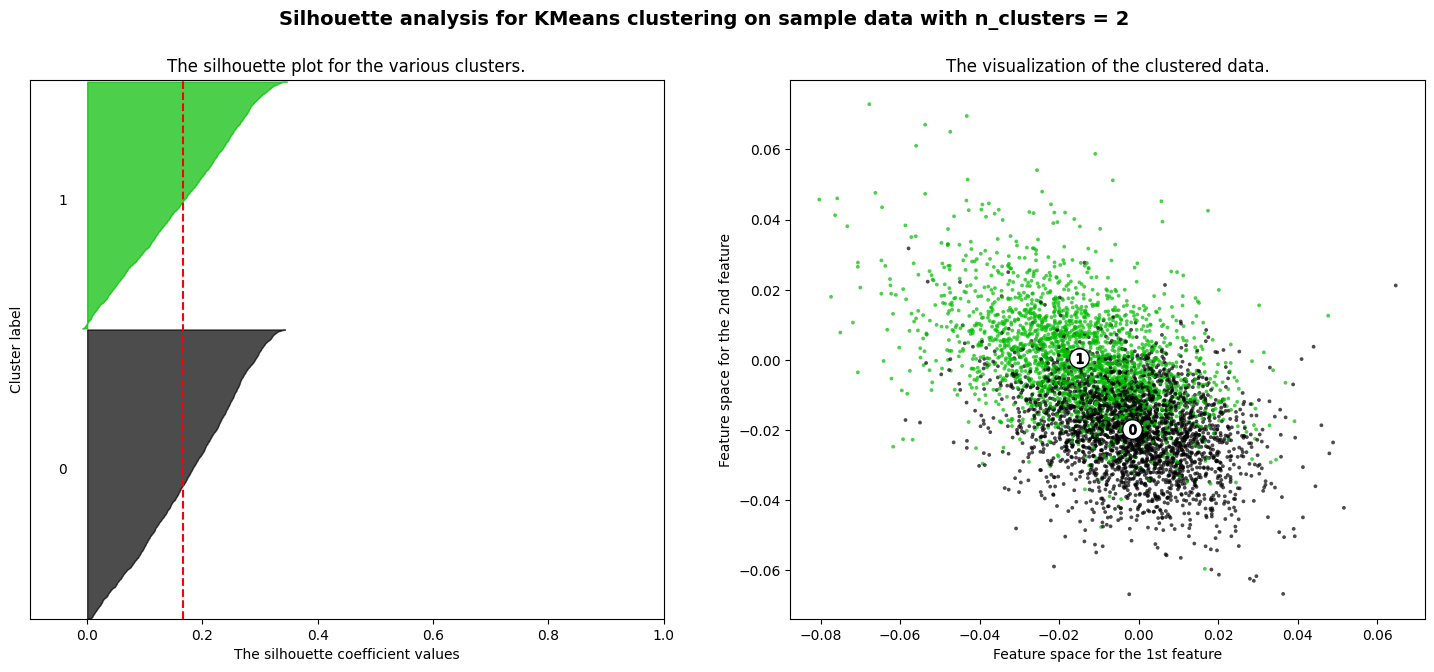

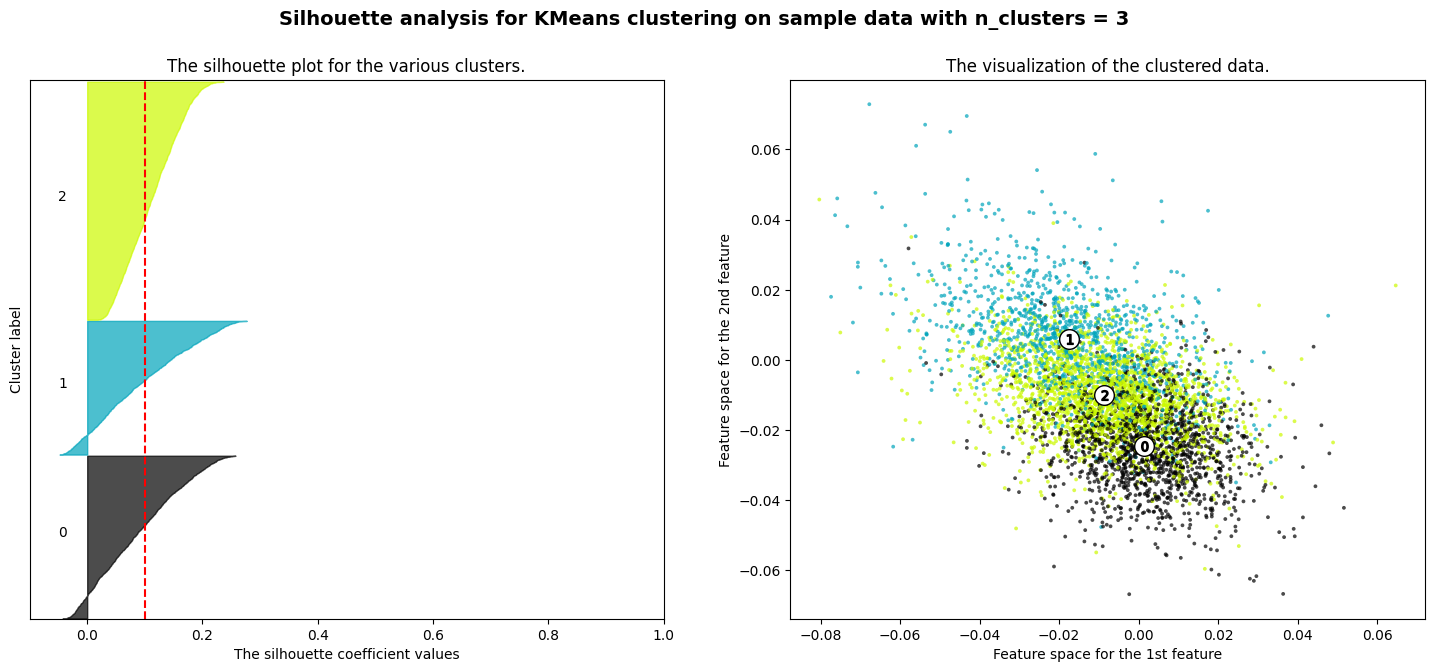

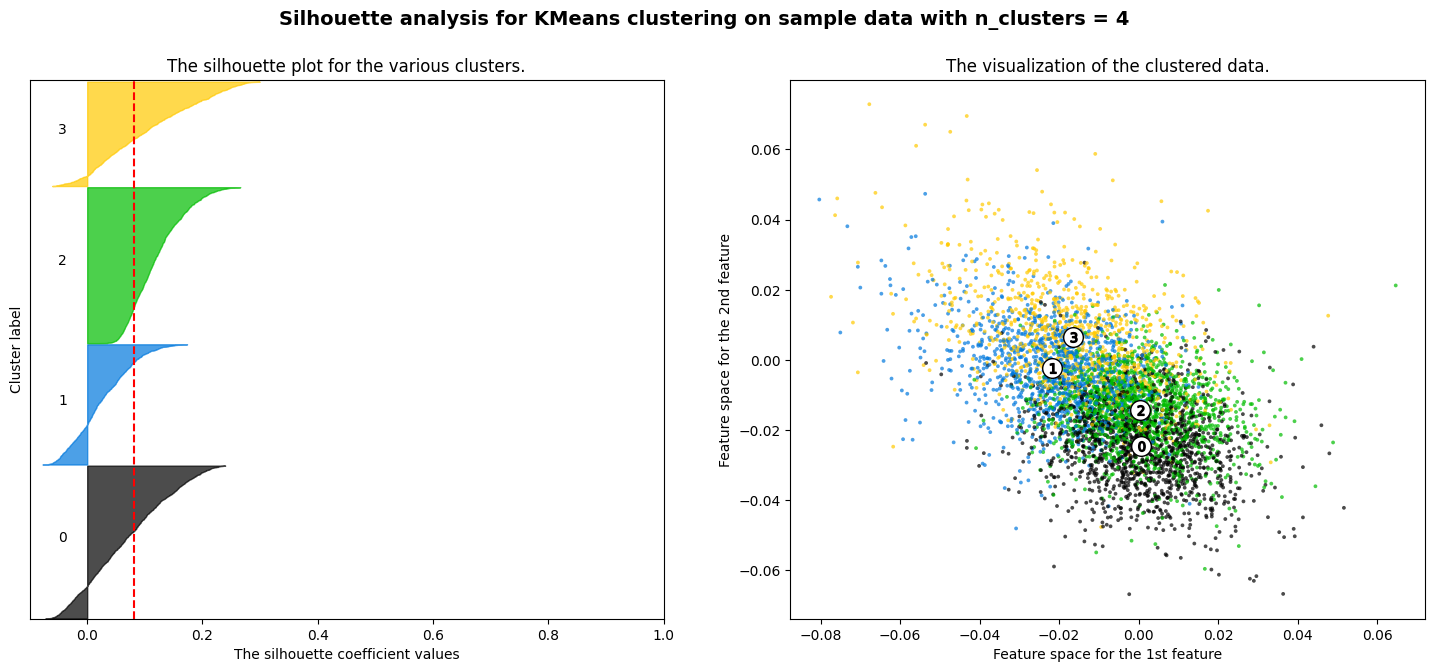

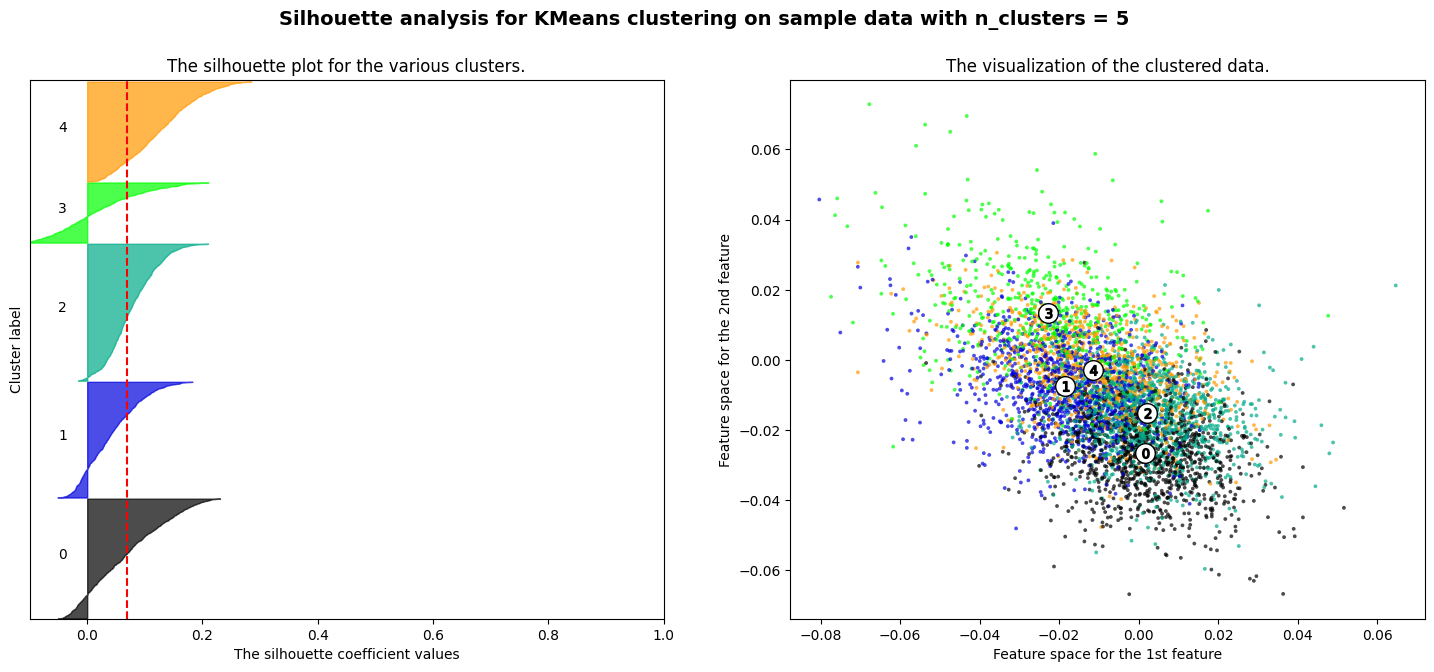

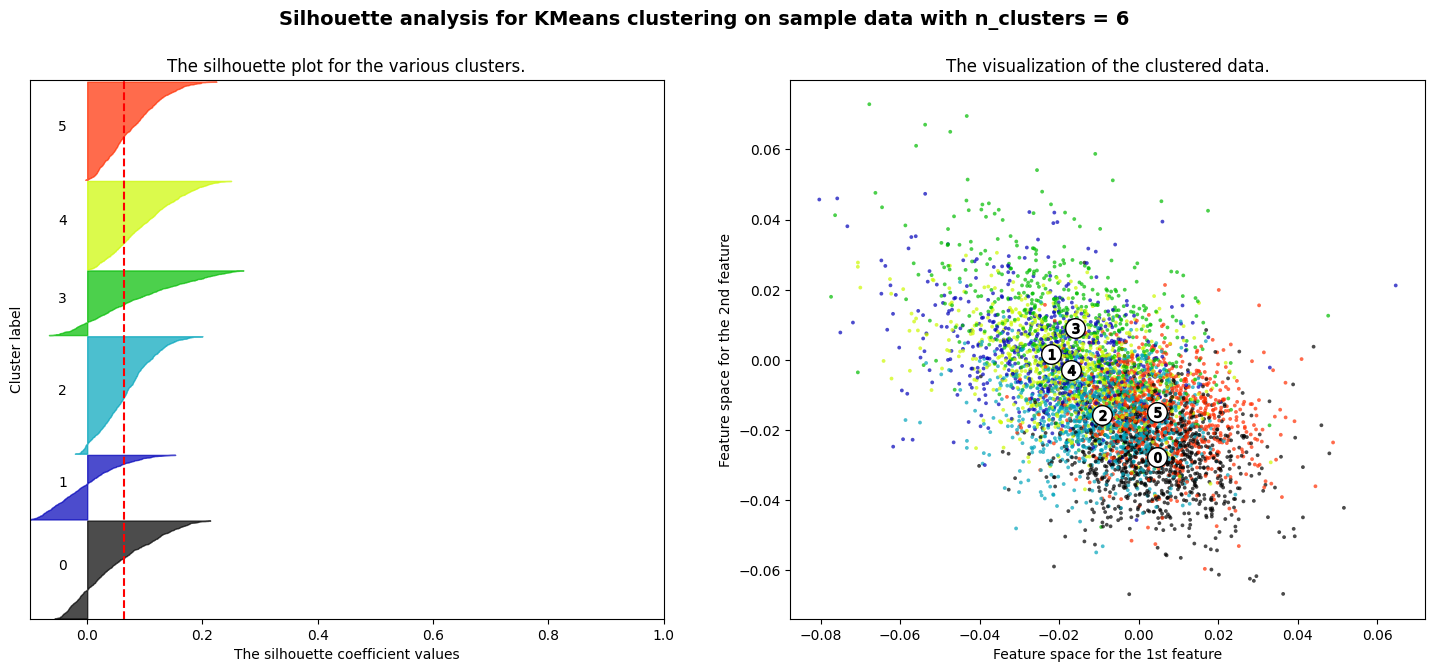

In [39]:
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

x= vector_df

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([ 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        np.array(x)[:, 0], np.array(x)[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

### Classification using Word2Vec

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

In [41]:
df = pd.read_csv("IMDB_Dataset.csv")
X = df.review
y = df.sentiment
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [42]:
df.review.str.split()

0        [One, of, the, other, reviewers, has, mentione...
1        [A, wonderful, little, production., <br, /><br...
2        [I, thought, this, was, a, wonderful, way, to,...
3        [Basically, there's, a, family, where, a, litt...
4        [Petter, Mattei's, "Love, in, the, Time, of, M...
                               ...                        
49995    [I, thought, this, movie, did, a, down, right,...
49996    [Bad, plot,, bad, dialogue,, bad, acting,, idi...
49997    [I, am, a, Catholic, taught, in, parochial, el...
49998    [I'm, going, to, have, to, disagree, with, the...
49999    [No, one, expects, the, Star, Trek, movies, to...
Name: review, Length: 50000, dtype: object

In [43]:
%%time
import gensim.models
# Next, you train the model.  Lots of parameters available.  The default model type
# is CBOW, which you can change to SG by setting sg=1

model = gensim.models.Word2Vec(sentences=df.review.str.split(), vector_size=100)

CPU times: user 2min 9s, sys: 1.69 s, total: 2min 10s
Wall time: 1min 16s


In [44]:
# Convert each review to a vector - these will be our 'features', or X
# We loop through each review, and get_mean_vector

vector_df = np.empty([0,100])
for review in (df.review):
    y = [x for x in review.split() if x in model.wv.key_to_index]
    vector_df = np.vstack([vector_df, model.wv.get_mean_vector(y)])

vector_df.shape



(50000, 100)

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(df.sentiment.values.ravel()) # This needs a 1D array

# Enumerate Encoded Classes
dict(list(enumerate(le.classes_)))

{0: 'negative', 1: 'positive'}

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector_df, y, test_size = 0.20)


In [47]:
# Fit the model
from xgboost import XGBClassifier

model_xgb = XGBClassifier(use_label_encoder=False, objective= 'binary:logistic')
model_xgb.fit(X_train, y_train)

/opt/conda/envs/mggy8413/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Checking accuracy on the training set

In [48]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_train)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     20008
           1       0.96      0.96      0.96     19992

    accuracy                           0.96     40000
   macro avg       0.96      0.96      0.96     40000
weighted avg       0.96      0.96      0.96     40000



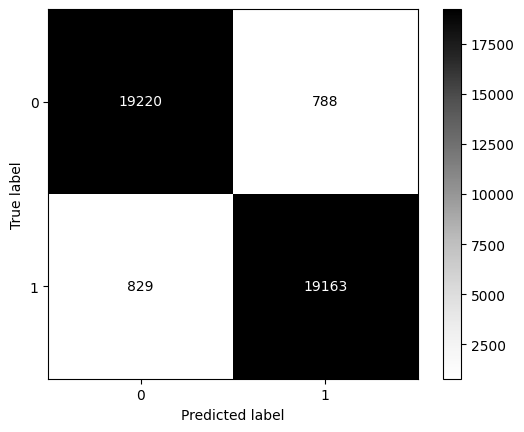

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_train, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_train, y = y_train, cmap='Greys');

In [50]:
# We can get probability estimates for class membership using XGBoost
model_xgb.predict_proba(X_test).round(3)

array([[0.573, 0.427],
       [0.654, 0.346],
       [0.009, 0.991],
       ...,
       [0.188, 0.812],
       [0.884, 0.116],
       [0.642, 0.358]], dtype=float32)

#### Checking accuracy on the test set

In [51]:
# Perform predictions, and store the results in a variable called 'pred'
pred = model_xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4992
           1       0.83      0.82      0.83      5008

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



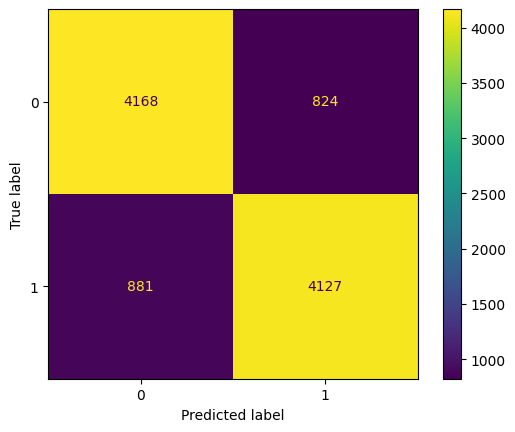

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
# Check the classification report and the confusion matrix
print(classification_report(y_true = y_test, y_pred = pred))
ConfusionMatrixDisplay.from_estimator(model_xgb, X = X_test, y = y_test);